<a href="https://colab.research.google.com/github/nhrishi/1.1.0-experimental_bin/blob/master/TradingIntel_v0_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas_ta
!pip install fyers_apiv3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=0f9823c694d8cea9aad562c4cb0ed82391abbd87531589af604d43134bb97be5
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.8/171.8 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 70.1 MB/s eta 0:00:00
     ━━━━━

In [ ]:
import numpy as np
import pandas as pd
import pandas_ta as ta
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.activations import relu, tanh, sigmoid

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import json as json

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from fyers_apiv3 import fyersModel

client_id = "Q9Y3IP8H5W-100"
#access_token = "eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE3MTc5MDU4OTIsImV4cCI6MTcxNzk3OTQ1MiwibmJmIjoxNzE3OTA1ODkyLCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbVpTbms3VGE2ektjb2ZuQlVMRjFQV05KbGI3UkJYZGVtaWlMV3pIcDlQdnRDdVJjYWRRUExSeWNZLTZBb2pFazRvZDhHNTNnVk9iWS1rX0diYk5JTVQ5LTZMcnBkODRiTjVDQ2RPTktvWWxJd0tzaz0iLCJkaXNwbGF5X25hbWUiOiJIUklTSElLRVNIIERFRVBBSyBOQVNISUtLQVIiLCJvbXMiOiJLMSIsImhzbV9rZXkiOiIzMDI1Y2IzMjkxYWEzYTcyMzM3MWIyYzkxOGU4YTc5ZDFkZDk5ODlmMmI3NjcwY2ViZGZkNjQyNiIsImZ5X2lkIjoiWUgwMTc3NSIsImFwcFR5cGUiOjEwMCwicG9hX2ZsYWciOiJOIn0.xguoXythWsSY5p8GrebQbkdp8qXVRMZa0m0agds9YJc"
access_token = "eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE3MTgxMjc1NTIsImV4cCI6MTcxODE1MjIxMiwibmJmIjoxNzE4MTI3NTUyLCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbWFJdkF0X053Z1NxUThpME9SU2RTdnptV21YOFJSYV9DRWd3b3ZMTm9uXzJwT21oSlY2VzRHNFdxNUExblI5YnEwbmJaMjZEbVhjZTYtQVhIcTBEVkFDR0V6YlFHSjlVYmdTanRpMzZiZldnYktxTT0iLCJkaXNwbGF5X25hbWUiOiJIUklTSElLRVNIIERFRVBBSyBOQVNISUtLQVIiLCJvbXMiOiJLMSIsImhzbV9rZXkiOiIzMDI1Y2IzMjkxYWEzYTcyMzM3MWIyYzkxOGU4YTc5ZDFkZDk5ODlmMmI3NjcwY2ViZGZkNjQyNiIsImZ5X2lkIjoiWUgwMTc3NSIsImFwcFR5cGUiOjEwMCwicG9hX2ZsYWciOiJOIn0.nAmIcXO_skFI-GUb4d0cPnerqPsLn0iAnLVbPTwZaMI"
# Initialize the FyersModel instance with your client_id, access_token, and enable async mode
fyers = fyersModel.FyersModel(client_id=client_id, is_async=False, token=access_token, log_path="")

#yyyy-mm-dd
daily_data = {
    "symbol":"MCX:SILVERMIC24JUNFUT",
    "resolution":"D",
    "date_format":"1",
    "range_from":"2023-06-07",
    "range_to":"2024-06-07",
    "cont_flag":"1"
}

response = fyers.history(data=daily_data)
print(response)
daily_data_json = json.dumps(response)
daily_data_df = json.loads(daily_data_json)
#print(daily_data_df['candles'])
pricing_daily_data = daily_data_df['candles']
daily_df = pd.DataFrame(pricing_daily_data)
daily_df.columns = ["epoch", "open", "high", "low", "close", "volume"]

# #hourly data Extraction
# hourly_data = {
#     "symbol":"NSE:SBIN-EQ",
#     "resolution":"60",
#     "date_format":"1",
#     "range_from":"2024-03-01",
#     "range_to":"2024-05-29",
#     "cont_flag":"1"
# }

import datetime
daily_df['date'] = pd.to_datetime(daily_df['epoch'], unit='s').dt.strftime('%Y-%m-%d')
print(daily_df)


{'candles': [[1686096000, 71950, 73100, 71625, 71801, 193199], [1686182400, 71900, 73768, 71851, 73602, 179798], [1686268800, 73680, 74218, 73456, 73752, 127795], [1686528000, 73523, 73700, 72742, 72943, 130841], [1686614400, 72960, 73816, 72100, 72167, 159653], [1686700800, 72321, 72750, 72178, 72631, 87586], [1686787200, 72423, 72423, 70820, 72131, 185890], [1686873600, 72250, 72950, 72056, 72626, 120429], [1687132800, 72659, 72894, 72325, 72434, 61389], [1687219200, 72400, 72588, 70312, 70473, 148364], [1687305600, 70440, 70529, 68702, 69360, 131922], [1687392000, 69151, 69151, 68121, 68442, 106046], [1687478400, 68111, 68914, 67640, 68067, 92338], [1687737600, 68270, 69395, 67590, 69189, 29602], [1687824000, 69666, 69899, 69200, 69430, 1485], [1687910400, 69660, 69660, 68760, 69300, 1250], [1687996800, 69277, 69299, 68000, 68595, 590], [1688083200, 69800, 70285, 69150, 70137, 148321], [1688342400, 70000, 70780, 69933, 70400, 108376], [1688428800, 70410, 70769, 70341, 70628, 62368],

In [ ]:
# Moving Average 20
daily_df['DAILY_RSI']=ta.rsi(daily_df.close, length=15)
daily_df['DAILY_EMA5']=ta.ema(daily_df.close, length=5)
# daily_df['DAILY_EMA12']=ta.ema(daily_df.close, length=12)
# daily_df['DAILY_EMA13']=ta.ema(daily_df.close, length=13)
# daily_df['DAILY_EMA26']=ta.ema(daily_df.close, length=26)
daily_df['DAILY_EMA50']=ta.ema(daily_df.close, length=50)

# Calculate MACD (the difference between 12-period EMA and 26-period EMA)
daily_df['DAILY_MACD'] = daily_df['DAILY_EMA12'] - daily_df['DAILY_EMA26']

# Calculate the 9-period EMA of MACD (Signal Line)
daily_df['DAILY_SIGNAL'] = daily_df['DAILY_MACD'].ewm(span=9, adjust=False).mean()

## Target calculation
daily_df['Target'] = daily_df['close'].shift(-1) - daily_df['close']  # Price Movement
# daily_df['Target'] = daily_df['Target'].shift(-1)

daily_df['TargetClass'] = [1 if daily_df.Target[i]>0 else 0 for i in range(len(daily_df))]
daily_df['TargetNextClose'] = daily_df['close'].shift(-1)

##ADX
adx_df = daily_df.ta.adx(high=daily_df['high'], low=daily_df['low'], close=daily_df['close']);
daily_df = pd.concat([daily_df, adx_df], axis=1)

##BB
bb_df = ta.bbands(daily_df.close, length=20, std=2).iloc[:, :3]
daily_df = pd.concat([daily_df, bb_df], axis=1)

#### Drop rows with NaN values created by indicators calculation

daily_df.dropna(inplace=True)
print(daily_df.shape)

(209, 24)


In [ ]:
features = ['close', 'DAILY_MACD', 'DAILY_RSI', 'DAILY_SIGNAL', 'volume', 'DAILY_EMA5', 'DAILY_EMA50', 'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0', 'Target', 'TargetClass', 'TargetNextClose', 'ADX_14']
# Normalize features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_df[features])
print(scaled_data.shape)

(209, 16)


In [ ]:
# Create sequences for LSTM model
def create_sequences(data, seq_length, pred_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length - pred_length + 1):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length:i + seq_length + pred_length, 0])  # Assuming 'Close' is the first column
    return np.array(sequences), np.array(labels)

# If the input data is not a 2D array, reshape it
if len(scaled_data.shape) != 2:
    scaled_data = scaled_data.reshape(-1, 1)

SEQ_LENGTH = 5  # 60 days sequence
PRED_LENGTH = 1  # Prediction length

X, y = create_sequences(scaled_data, SEQ_LENGTH, PRED_LENGTH)

# Split into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 5, 16)
(160, 5)
(40, 5, 16)
(40, 5)


In [ ]:
model = Sequential([
    LSTM(150, activation='tanh', return_sequences=True, input_shape=(SEQ_LENGTH, X_train.shape[2])),
#    BatchNormalization(),
    Dropout(0.2),
    LSTM(150, activation='tanh', return_sequences=True),
    Dropout(0.2),
    LSTM(150, activation='tanh'),
    Dropout(0.2),
    Dense(PRED_LENGTH, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error')
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/60
5/5 [==============================] - 8s 539ms/step - loss: 0.0338 - val_loss: 0.1948
Epoch 2/60
5/5 [==============================] - 0s 95ms/step - loss: 0.0103 - val_loss: 0.0624
Epoch 3/60
5/5 [==============================] - 0s 99ms/step - loss: 0.0079 - val_loss: 0.1755
Epoch 4/60
5/5 [==============================] - 0s 65ms/step - loss: 0.0072 - val_loss: 0.1029
Epoch 5/60
5/5 [==============================] - 0s 45ms/step - loss: 0.0054 - val_loss: 0.0692
Epoch 6/60
5/5 [==============================] - 0s 44ms/step - loss: 0.0049 - val_loss: 0.0977
Epoch 7/60
5/5 [==============================] - 0s 45ms/step - loss: 0.0044 - val_loss: 0.0633
Epoch 8/60
5/5 [==============================] - 0s 45ms/step - loss: 0.0047 - val_loss: 0.0543
Epoch 9/60
5/5 [==============================] - 0s 44ms/step - loss: 0.0045 - val_loss: 0.0630
Epoch 10/60
5/5 [==============================] - 0s 46ms/step - loss: 0.0039 - val_loss: 0.0482
Epoch 11/60
5/5 [===========

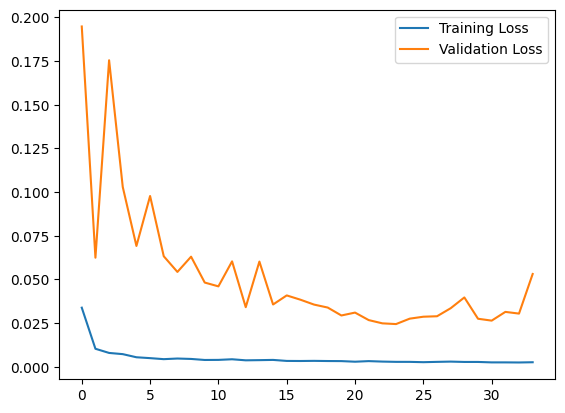

X_test (40, 5, 16)
2/2 [==============================] - 1s 25ms/step


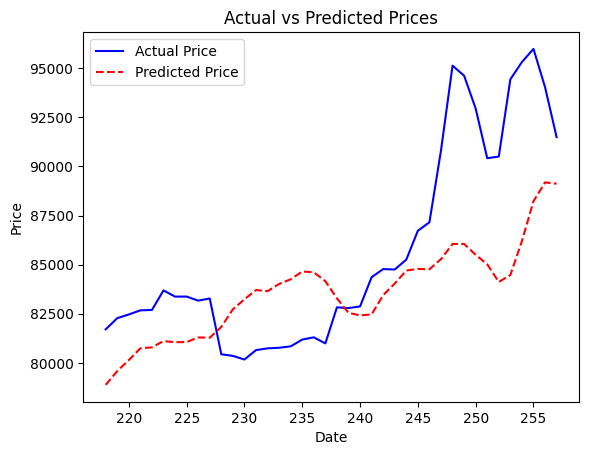

In [ ]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

print("X_test", X_test.shape)

# Make predictions
test_predictions = model.predict(X_test)

test_predictions_reshaped = np.zeros((test_predictions.shape[0], scaled_data.shape[1]))
test_predictions_reshaped[:, 0] = test_predictions[:, 0]  # Only 'Close' prices are predicted
test_predictions_inversed = scaler.inverse_transform(test_predictions_reshaped)[:, 0]
# Plot predicted vs actual prices
plt.plot(daily_df.index[-len(y_test):], scaler.inverse_transform(np.concatenate([y_test, np.zeros((y_test.shape[0], scaled_data.shape[1] - y_test.shape[1]))], axis=1))[:, 0], color='blue', label='Actual Price')

plt.plot(daily_df.index[-len(test_predictions):], test_predictions_inversed, color='red', linestyle='--', label='Predicted Price')

# Adding titles and labels
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
# Function to make predictions iteratively
def predict_next_days(model, recent_data, num_days=1): # Default num_days to 1
    current_sequence = recent_data
    current_sequence_reshaped = np.reshape(current_sequence, (1, current_sequence.shape[0], current_sequence.shape[1]))
    next_prediction = model.predict(current_sequence_reshaped)[0]  # Predict for the next day
    return next_prediction # Return the single prediction

# Define thresholds for low, medium, and high movement (adjust as needed)
low_threshold = 0.01  # 1%
high_threshold = 0.03  # 3%

# Predict for the next day
recent_data = scaled_data[-SEQ_LENGTH:]  # Recent data for prediction
predicted_next_day = predict_next_days(model, recent_data)  # Predict for only one day

# Reshape and inverse transform to get the actual price movement
predicted_next_day_reshaped = np.zeros((1, scaled_data.shape[1]))
predicted_next_day_reshaped[:, 0] = predicted_next_day[0]
predicted_movement = scaler.inverse_transform(predicted_next_day_reshaped)[0, 0]

# Categorize the movement and calculate percentage change
last_close_price = daily_df['close'].iloc[-1]
percentage_change = (predicted_movement / last_close_price) * 100

if abs(percentage_change) < low_threshold:
    movement_category = "Low"
elif abs(percentage_change) < high_threshold:
    movement_category = "Medium"
else:
    movement_category = "High"

print(f"Predicted Movement: {movement_category}")
print(f"Percentage Change: {percentage_change:.2f}%")

if predicted_movement > 0:
    print("Upside Movement")
else:
    print("Downside Movement")

current: (5, 16)
current_sequence_reshaped (1, 5, 16) [[[0.84512923 0.92132808 0.49234505 1.         0.56970478 0.96427643
   0.99806041 0.96154929 0.93454694 0.78036059 0.9210709  0.99628796
   0.59060241 1.         0.86210704 0.84735388]
  [0.86210704 0.87268463 0.50824324 0.9921036  0.45873428 0.94798235
   1.         0.97434658 0.95338671 0.83188222 0.94314386 0.99697225
   0.24325301 0.         0.77953    0.8014825 ]
  [0.77953    0.78809338 0.40053448 0.96568994 0.47109291 0.90630656
   0.98624445 0.9768531  0.96509385 0.88599466 0.95953892 0.98704003
   0.58698795 1.         0.80523828 0.75066259]
  [0.80523828 0.72800831 0.42744947 0.93028444 0.3240575  0.88811557
   0.979254   0.98208261 0.97833244 0.94787409 0.97752698 0.97448927
   0.90963855 1.         0.92080472 0.69937035]
  [0.92080472 0.73071538 0.53255342 0.90260317 0.44790333 0.91911108
   0.99483974 1.         1.         1.         1.         0.97540309
   0.         0.         0.7634839  0.67713105]]]
1/1 [=========